In [1]:
import json
import pandas as pd
import gzip
import numpy as np
import matplotlib.pyplot as plt

# Familiarize Yourself with the Dataset
In the lab sessions, we will work with the "All Beauty" category of the Amazon Review Data, and we will use the 5-core subset. You can download the dataset and find information about it here: https://nijianmo.github.io/amazon/index.html

## Exercise 1
Download and import the 5-core dataset.

In [3]:
import glob
glob.glob("*.gz")

['meta_All_Beauty.json.gz',
 'meta_Software.json.gz',
 'Software_5.json.gz',
 'All_Beauty_5.json.gz']

In [5]:
def parse(path):
  g = gzip.open(path, 'rb')
  for l in g:
    yield json.loads(l)

def getDF(path):
  i = 0
  df = {}
  for d in parse(path):
    df[i] = d
    i += 1
  return pd.DataFrame.from_dict(df, orient='index')

df = getDF('Software_5.json.gz')
df

,overall,verified,reviewTime,reviewerID,asin,style,reviewerName,reviewText,summary,unixReviewTime,vote,image
0,4.0,False,"10 20, 2010",A38NELQT98S4H8,0321719816,{'Format:': ' DVD-ROM'},WB Halper,I've been using Dreamweaver (and it's predeces...,A solid overview of Dreamweaver CS5,1287532800,NaN,NaN
1,4.0,False,"10 18, 2010",A3QJU4FEN8PQSZ,0321719816,{'Format:': ' DVD-ROM'},Grimmy,"The demo is done with the PC version, with ref...",A good value,1287360000,NaN,NaN
2,5.0,False,"10 16, 2010",ACJT8MUC0LRF0,0321719816,{'Format:': ' DVD-ROM'},D. Fowler,If you've been wanting to learn how to create ...,This is excellent software for those who want ...,1287187200,3,NaN
3,5.0,False,"10 12, 2010",AYUF7YETYOLNX,0321719816,{'Format:': ' DVD-ROM'},Bryan Newman,I've been creating websites with Dreamweaver f...,A Fantastic Overview of Dream Weaver and Web D...,1286841600,NaN,NaN
4,5.0,False,"10 7, 2010",A31ICLWQ9CSHRS,0321719816,{'Format:': ' DVD-ROM'},Al Swanson,I decided (after trying a number of other prod...,Excellent Tutorials!,1286409600,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
12800,4.0,False,"07 16, 2016",A1E50L7PCVXLN4,B01FFVDY9M,{'Platform:': ' Key Card'},Colinda,When I ordered this it was listed as Photo Edi...,File Management Software with Basic Editing Ca...,1468627200,NaN,NaN
12801,3.0,False,"06 17, 2017",AVU1ILDDYW301,B01HAP3NUG,NaN,G. Hearn,This software has SO much going on. Theres a ...,"Might not be for the ""novice""",1497657600,NaN,NaN
12802,4.0,False,"01 24, 2017",A2LW5AL0KQ9P1M,B01HAP3NUG,NaN,Dr. E,I have used both more complex and less complex...,"Great, Inexpensive Software for Those Who Have...",1485216000,NaN,NaN
12803,3.0,False,"06 14, 2018",AZ515FFZ7I2P7,B01HAP47PQ,{'Platform:': ' PC Disc'},Jerry Jackson Jr.,Pinnacle Studio 20 Ultimate is a perfectly ser...,Gets the job done ... but not as easy as it sh...,1528934400,NaN,NaN


## Exercise 2
Clean the dataset from missing ratings and duplicates (cases where the same user has rated the same item multiple times) if any. How many observations does the cleaned dataset have?

In [7]:
df = df[df["overall"].notnull()]
print(len(df))
df = df.sort_values(["reviewerID", "asin", 'unixReviewTime']).drop_duplicates(subset=["reviewerID", "asin"], keep="last")
print(len(df))


11884
11884


## Exercise 3
Create a test set by extracting the latest (in time) positively rated item (rating $\geq 4$) by each user. Remove users that do not appear in the training set. How many observations does the training and test set have?

In [8]:
test = df[df["overall"] >= 4].sort_values("unixReviewTime").drop_duplicates(subset=["reviewerID"], keep="last")
len(test)

1713

In [9]:
train = df.drop(labels=test.index)
test = test.loc[test["reviewerID"].isin(train["reviewerID"])]
len(train), len(test)

(10171, 1711)

In [55]:
# # idx = dff.groupby(['reviewerID'])['unixReviewTime'].transform(max) == dff['unixReviewTime']
# idx = df4.groupby(by='reviewerID')['unixReviewTime'].idxmax()
# train = df.drop(labels=idx)


# test = df4.loc[idx]
# test = test.loc[test["reviewerID"].isin(train["reviewerID"])]

# len(train), len(test)

In [56]:
# last_reviewed = df4.sort_values('unixReviewTime').drop_duplicates(['reviewerID'])

# train = df.drop(last_reviewed.index)
# test = last_reviewed.loc[last_reviewed["reviewerID"].isin(train["reviewerID"].unique())]
# len(train), len(test)

In [57]:
train.to_pickle("train.pkl")
test.to_pickle("test.pkl")

## Exercise 4
### 4.1
Compute the number of ratings per user in the training set. What is the summary statistics of the number of ratings, and how does a histogram look like? <br>
Reflect on how a collaborative filtering and a content-based recommender system, respectively, will perform for users with few ratings.

count    981.000000
mean       3.193680
std        0.610454
min        1.000000
25%        3.000000
50%        3.000000
75%        3.000000
max        9.000000
dtype: float64

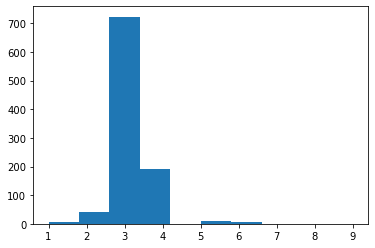

In [58]:
sizes = train.groupby(by="reviewerID").size()
plt.hist(sizes); sizes.describe()

### 4.2
Compute the number of ratings per item in the training set. How does a barplot of the number of ratings ordered by decreasing frequency look like? <br>
Reflect on how it will affect the prediction process of a recommender system if only a small fraction of the items are rated frequently. <br>
<br>
Repeat this exercise on the test set and reflect on how the evaluation of a recommender system can be affected by popular items.

41.77333333333333

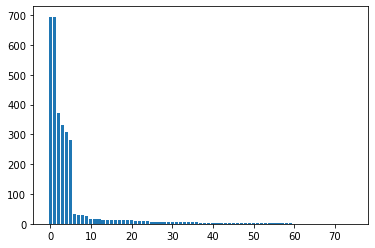

In [59]:
sizes = train.groupby(by="asin").size()
plt.bar(np.arange(len(sizes)), np.sort(sizes)[::-1]); sizes.mean()

18.98

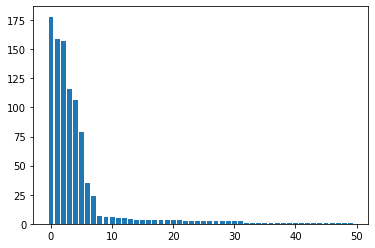

In [60]:
sizes = test.groupby(by="asin").size()
plt.bar(np.arange(len(sizes)), np.sort(sizes)[::-1]); sizes.mean()

### 4.3
Compute the mean rating per user in the training set. What is the summary statistics of the rating means, and how does a histogram look like? <br>
Reflect on how a recommender system can take into account if different users rate on different "scales" (e.i. a rating of $3$ may be high for one user while low for another).<br>
<br>
Repeat this exercise with mean rating per item.

count    981.000000
mean       4.767839
std        0.720012
min        1.000000
25%        5.000000
50%        5.000000
75%        5.000000
max        5.000000
Name: overall, dtype: float64

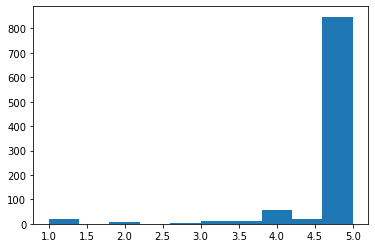

In [61]:
ratings = train.groupby(by=["reviewerID"])["overall"].mean()
plt.hist(ratings)
ratings.describe()

count    75.000000
mean      4.243027
std       0.896124
min       1.000000
25%       3.840517
50%       4.583333
75%       4.962541
max       5.000000
Name: overall, dtype: float64

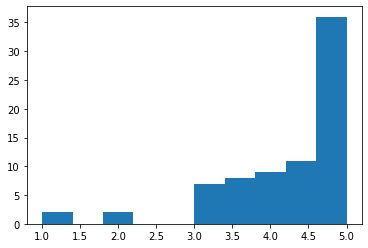

In [62]:
ratings = train.groupby(by=["asin"])["overall"].mean()
plt.hist(ratings); ratings.describe()